## Основное задание

Significant factors based on p-value: [('MedInc', 0.6906466061467704), ('HouseAge', 0.10370632403710708), ('AveRooms', 0.15848486725499633), ('AveBedrms', -0.05135098593689967), ('Population', -0.02603238666851839), ('AveOccup', -0.02202995862755844), ('Latitude', -0.14298334973669913), ('Longitude', -0.04634888300866163)]
Highly correlated factor pairs: [('AveRooms', 'AveBedrms'), ('AveBedrms', 'AveRooms'), ('Latitude', 'Longitude'), ('Longitude', 'Latitude')]
Current factors: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Enter the name of the factor to remove (or 'done' to finish): done
Train R^2: 0.6125511913966952, Train MSE: 0.5179331255246699
Test R^2: 0.5757877060324508, Test MSE: 0.5558915986952444


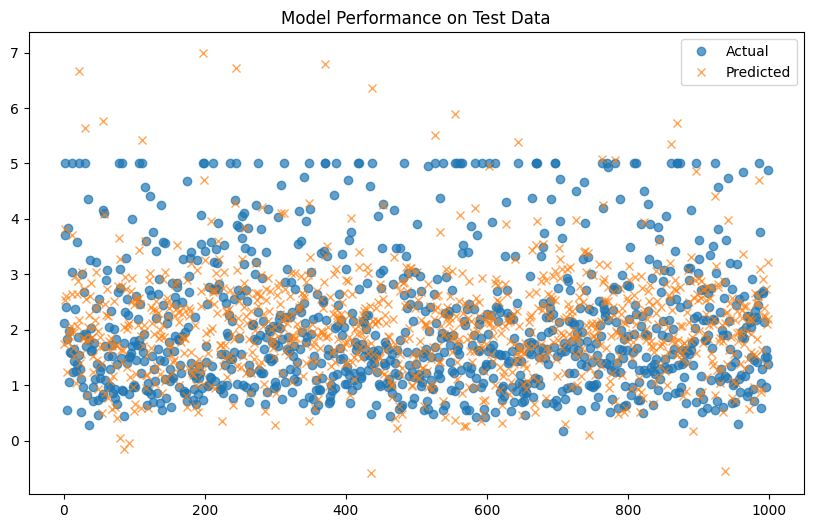

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from scipy.stats import pearsonr

# Load the California housing data
def load_data():
    housing = fetch_california_housing()
    data = pd.DataFrame(housing.data, columns=housing.feature_names)
    data['PRICE'] = housing.target
    return data

# Fit a Linear Multifactorial Model (LMFM)
def fit_lmfm(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

# Evaluate significant factors
def evaluate_factors(X, y, significance_level):
    significant_factors = []
    for column in X.columns:
        correlation, p_value = pearsonr(X[column], y)
        if p_value < significance_level:
            significant_factors.append((column, correlation))
    return significant_factors

# Filter factors based on multicollinearity
def filter_multicollinearity(X, threshold=0.8):
    correlation_matrix = X.corr()
    high_correlation_pairs = [
        (col1, col2)
        for col1 in correlation_matrix.columns
        for col2 in correlation_matrix.columns
        if col1 != col2 and abs(correlation_matrix[col1][col2]) > threshold
    ]
    return high_correlation_pairs

# Select significant factors based on user input
def select_significant_factors(X, y, significance_level):
    while True:
        significant_factors = evaluate_factors(X, y, significance_level)
        print("Significant factors based on p-value:", significant_factors)

        high_corr_pairs = filter_multicollinearity(X)
        print("Highly correlated factor pairs:", high_corr_pairs)

        print("Current factors:", X.columns.tolist())
        to_remove = input("Enter the name of the factor to remove (or 'done' to finish): ")

        if to_remove.lower() == 'done':
            break

        if to_remove in X.columns:
            X = X.drop(columns=[to_remove])
        else:
            print("Factor not found. Please enter a valid factor name.")

    return X

# Assess model adequacy
def assess_model(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

# Visualize results with sampling
def visualize_results(y_true, y_pred, title, sample_size=1000):
    import matplotlib.pyplot as plt
    import random

    if len(y_true) > sample_size:
        indices = random.sample(range(len(y_true)), sample_size)
        y_true = np.array(y_true)[indices]
        y_pred = np.array(y_pred)[indices]

    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label="Actual", marker='o', linestyle='', alpha=0.7)
    plt.plot(y_pred, label="Predicted", marker='x', linestyle='', alpha=0.7)
    plt.title(title)
    plt.legend()
    plt.show()

# Main workflow
def main():
    data = load_data()
    response_var = 'PRICE'
    factor_vars = [col for col in data.columns if col != response_var]

    y = data[response_var]
    X = data[factor_vars]

    significance_level = 0.05

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Select significant factors with user interaction
    X_train = select_significant_factors(X_train, y_train, significance_level)
    X_test = X_test[X_train.columns]

    # Fit model
    model = fit_lmfm(X_train, y_train)

    # Assess model adequacy
    r2_train, mse_train = assess_model(model, X_train, y_train)
    r2_test, mse_test = assess_model(model, X_test, y_test)
    print(f"Train R^2: {r2_train}, Train MSE: {mse_train}")
    print(f"Test R^2: {r2_test}, Test MSE: {mse_test}")

    # Visualize results
    visualize_results(y_test, model.predict(X_test), "Model Performance on Test Data")

if __name__ == "__main__":
    main()


## Бонусное задание

Enter the number of lags to create: 0
Enter the start index for the response series: 100
Enter the end index for the response series: 800
Significant factors based on p-value: [('MedInc', 0.743011543622697), ('AveRooms', 0.5715148935845864), ('AveBedrms', -0.14640558574631876), ('AveOccup', -0.2005597843292827), ('Latitude', 0.3226904694136209), ('Longitude', -0.15870622087476102)]
Highly correlated factor pairs: [('Latitude', 'Longitude'), ('Longitude', 'Latitude')]
Current factors: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Enter the name of the factor to remove (or 'done' to finish): done
Train R^2: 0.6427939480527547, Train MSE: 0.2899918920095588
Test R^2: 0.754694054244831, Test MSE: 0.20631366574466187


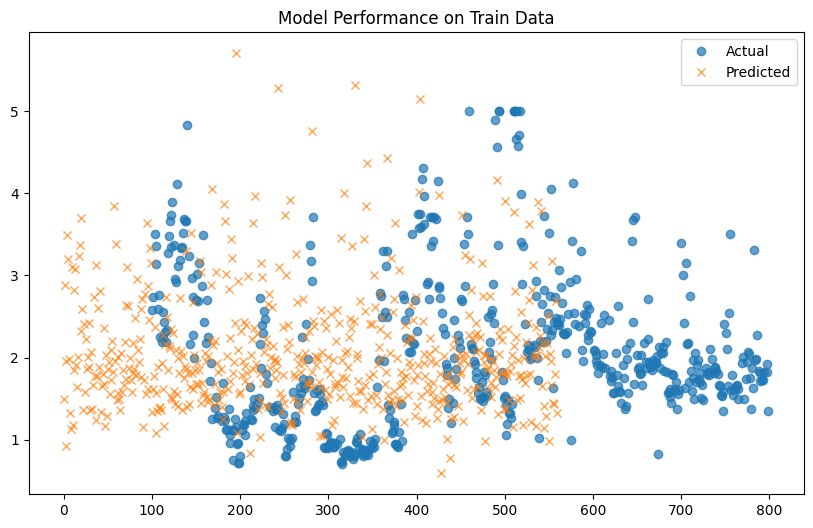

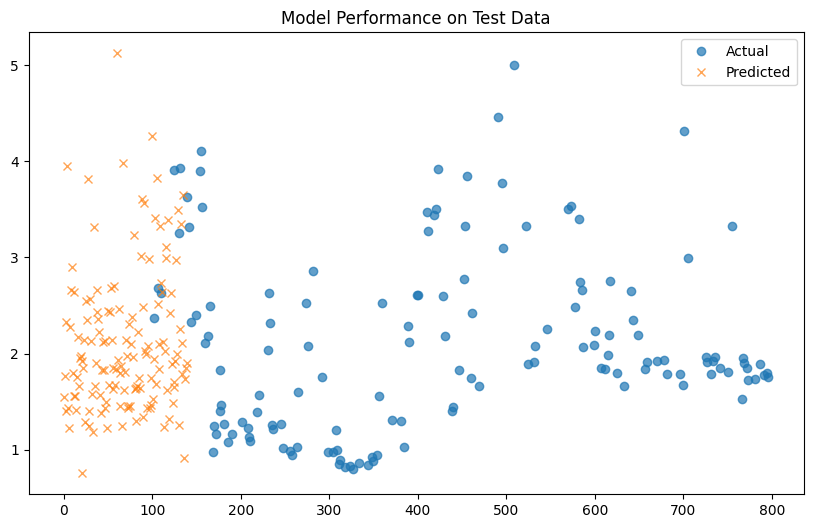

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from scipy.stats import pearsonr

# Load the California housing data
def load_data():
    housing = fetch_california_housing()
    data = pd.DataFrame(housing.data, columns=housing.feature_names)
    data['PRICE'] = housing.target
    return data

# Create lagged features
def create_lagged_features(X, lags):
    lagged_data = pd.DataFrame()
    for col in X.columns:
        for lag in range(1, lags + 1):
            lagged_data[f"{col}_lag{lag}"] = X[col].shift(lag)
    return lagged_data

# Subset response series
def subset_response_series(y, start, end):
    return y.iloc[start:end]

# Fit a Linear Multifactorial Model (LMFM)
def fit_lmfm(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

# Evaluate significant factors
def evaluate_factors(X, y, significance_level):
    significant_factors = []
    for column in X.columns:
        correlation, p_value = pearsonr(X[column].dropna(), y[:len(X[column].dropna())])
        if p_value < significance_level:
            significant_factors.append((column, correlation))
    return significant_factors

# Filter factors based on multicollinearity
def filter_multicollinearity(X, threshold=0.8):
    correlation_matrix = X.corr()
    high_correlation_pairs = [
        (col1, col2)
        for col1 in correlation_matrix.columns
        for col2 in correlation_matrix.columns
        if col1 != col2 and abs(correlation_matrix[col1][col2]) > threshold
    ]
    return high_correlation_pairs

# Select significant factors based on user input
def select_significant_factors(X, y, significance_level):
    while True:
        significant_factors = evaluate_factors(X, y, significance_level)
        print("Significant factors based on p-value:", significant_factors)

        high_corr_pairs = filter_multicollinearity(X)
        print("Highly correlated factor pairs:", high_corr_pairs)

        print("Current factors:", X.columns.tolist())
        to_remove = input("Enter the name of the factor to remove (or 'done' to finish): ")

        if to_remove.lower() == 'done':
            break

        if to_remove in X.columns:
            X = X.drop(columns=[to_remove])
        else:
            print("Factor not found. Please enter a valid factor name.")

    return X

# Assess model adequacy
def assess_model(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

# Visualize results with sampling
def visualize_results(y_true, y_pred, title, sample_size=1000):
    import matplotlib.pyplot as plt
    import random

    if len(y_true) > sample_size:
        indices = random.sample(range(len(y_true)), sample_size)
        y_true = np.array(y_true)[indices]
        y_pred = np.array(y_pred)[indices]

    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label="Actual", marker='o', linestyle='', alpha=0.7)
    plt.plot(y_pred, label="Predicted", marker='x', linestyle='', alpha=0.7)
    plt.title(title)
    plt.legend()
    plt.show()

# Main workflow
def main():
    data = load_data()
    response_var = 'PRICE'
    factor_vars = [col for col in data.columns if col != response_var]

    y = data[response_var]
    X = data[factor_vars]

    # Create lagged features
    lags = int(input("Enter the number of lags to create: "))
    X_lagged = create_lagged_features(X, lags)
    X = pd.concat([X, X_lagged], axis=1).dropna()
    y = y[len(y) - len(X):]

    # Subset response series
    start = int(input("Enter the start index for the response series: "))
    end = int(input("Enter the end index for the response series: "))
    y = subset_response_series(y, start, end)
    X = X.iloc[start:end]

    significance_level = 0.05

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Select significant factors with user interaction
    X_train = select_significant_factors(X_train, y_train, significance_level)
    X_test = X_test[X_train.columns]

    # Fit model
    model = fit_lmfm(X_train, y_train)

    # Assess model adequacy
    r2_train, mse_train = assess_model(model, X_train, y_train)
    r2_test, mse_test = assess_model(model, X_test, y_test)
    print(f"Train R^2: {r2_train}, Train MSE: {mse_train}")
    print(f"Test R^2: {r2_test}, Test MSE: {mse_test}")

    # Visualize results for train
    visualize_results(y_train, model.predict(X_train), "Model Performance on Train Data")

    # Visualize results for test
    visualize_results(y_test, model.predict(X_test), "Model Performance on Test Data")

if __name__ == "__main__":
    main()